In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from sklearn.utils import shuffle
import numpy as np
from numpy import genfromtxt
X=np.zeros((847,8000,1))
Y=np.zeros((847,2))


for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(i+1)+".csv", delimiter=',')
  my_data2 = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  X[i,:,0]=my_data
  Y[i,:]=my_data2

In [4]:
X, Y = shuffle(X, Y)

In [5]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)
 
    # Train

X_train = X[:split_train, [0],:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid, [0],:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:, [0],:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 8000, 1) (592, 2)
(170, 8000, 1) (170, 2)
(85, 8000, 1) (85, 2)


In [1]:
#Utilizing 2 layered MLP
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[8000,1]),
    keras.layers.Dense(2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16002     
Total params: 16,002
Trainable params: 16,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
# The default learning rate is 0.01 and no momentum is used by default.
# https://keras.io/api/optimizers/adam/
model.compile(loss="mse", optimizer="adam",metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
19/19 [==============================] - 2s 23ms/step - loss: 6.2105 - acc: 0.7534 - val_loss: 2.8709 - val_acc: 0.8412
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 1.7942 - acc: 0.8361 - val_loss: 1.3530 - val_acc: 0.8647
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9083 - acc: 0.8953 - val_loss: 0.9613 - val_acc: 0.8765
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6093 - acc: 0.8750 - val_loss: 0.8516 - val_acc: 0.8471
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 0.5136 - acc: 0.8902 - val_loss: 0.7719 - val_acc: 0.8471
Epoch 6/100
19/19 [==============================] - 0s 18ms/step - loss: 0.4336 - acc: 0.8885 - val_loss: 0.7250 - val_acc: 0.8588
Epoch 7/100
19/19 [==============================] - 0s 17ms/step - loss: 0.3802 - acc: 0.8953 - val_loss: 0.6887 - val_acc: 0.8765
Epoch 8/100
19/19 [==============================] - 0s 12ms/step - loss: 0.329

Text(0.5, 1.0, 'Training and validation loss')

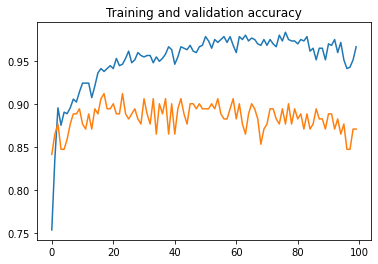

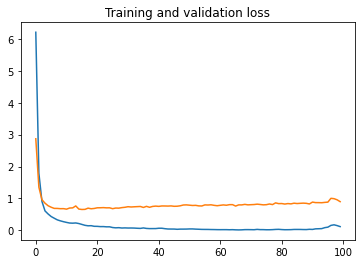

In [7]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [8]:
y_predictim=model.predict(X_test)

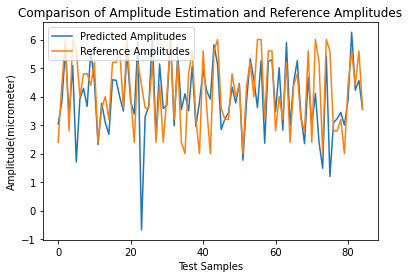

In [9]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

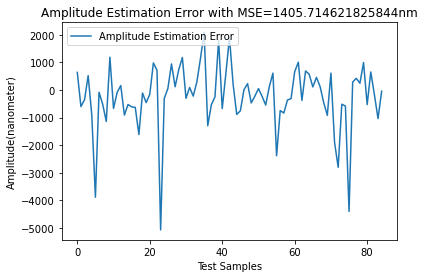

In [10]:
from sklearn.metrics import mean_squared_error
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

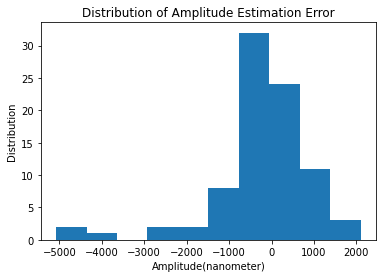

In [11]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

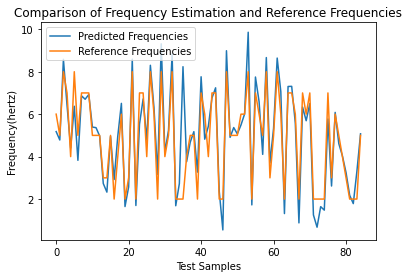

In [12]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

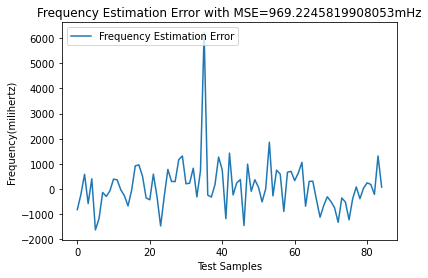

In [13]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

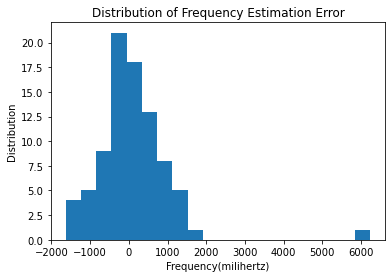

In [14]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()